# NYC Taxi Fare Prediction - Import Datasets

## 1. Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

## 2. Load Dataset

In [7]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.shape, test.shape

((500000, 8), (100000, 7))

# NYC Taxi Fare Prediction – Exploratory Data Analysis (EDA)

## 1. Objective

This section performs **systematic EDA** on the NYC Taxi Fare dataset to understand data quality, distributions, relationships, and insights that guide data cleaning and feature engineering.

In [6]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-05-03_16:08:21+00:00.154333,4.91,2015-05-03 16:08:21+00:00,-73.831299,40.801849,-73.833754,40.794868,2
1,2010-10-19_21:29:02+00:00.11703,6.76,2010-10-19 21:29:02+00:00,-73.961197,40.639437,-73.954451,40.651165,3
2,2015-01-21_19:31:56+00:00.406232,5.29,2015-01-21 19:31:56+00:00,-73.791999,40.645832,-73.782077,40.649479,2
3,2013-01-15_22:56:09+00:00.755995,4.19,2013-01-15 22:56:09+00:00,-73.973121,40.789355,-73.971657,40.794306,4
4,2013-12-03_10:57:02+00:00.558975,6.16,2013-12-03 10:57:02+00:00,-73.871058,40.664855,-73.875207,40.675397,3


In [7]:
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2012-01-25_08:23:00+00:00.992895,2012-01-25 08:23:00+00:00,-73.904410,40.766207,-73.894175,40.741769,5
1,2015-01-18_19:47:17+00:00.935105,2015-01-18 19:47:17+00:00,-74.020514,40.752473,-74.029222,40.757308,3
2,2010-08-21_03:07:46+00:00.862087,2010-08-21 03:07:46+00:00,-74.005997,40.816931,-74.037135,40.814233,4
3,2009-09-05_23:22:59+00:00.608718,2009-09-05 23:22:59+00:00,-73.932362,40.683296,-73.937134,40.701663,1
4,2013-06-07_22:29:23+00:00.565853,2013-06-07 22:29:23+00:00,-73.833516,40.817646,-73.836667,40.809379,4


**Observation:**

* Train contains the target variable `fare_amount`
* Test data has identical feature structure except the target

## 2. Basic Data Inspection

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                500000 non-null  object 
 1   fare_amount        500000 non-null  float64
 2   pickup_datetime    500000 non-null  object 
 3   pickup_longitude   500000 non-null  float64
 4   pickup_latitude    500000 non-null  float64
 5   dropoff_longitude  500000 non-null  float64
 6   dropoff_latitude   500000 non-null  float64
 7   passenger_count    500000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 30.5+ MB


In [9]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,6.095970,-73.899894,40.739989,-73.899898,40.739981,3.501236
std,1.934396,0.086556,0.063499,0.086816,0.063868,1.708210
min,3.000000,-74.049999,40.630001,-74.050000,40.630000,1.000000
25%,4.630000,-73.974813,40.684958,-73.974717,40.684933,2.000000
50%,5.840000,-73.899757,40.740037,-73.899714,40.740074,3.000000
75%,7.280000,-73.824938,40.794919,-73.824950,40.794846,5.000000
max,17.640000,-73.750002,40.849999,-73.750000,40.850000,6.000000


**Observations:**

* `pickup_datetime` needs datetime conversion
* GPS coordinates are numerical
* Fare shows high variance → possible outliers

## 3. Convert Datetime Column

In [8]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'], utc=True)
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'], utc=True)

## 4. Missing Values & Duplicates

In [11]:
train.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [12]:
train.duplicated().sum()

np.int64(0)

**Observation:**

* Any missing GPS or fare rows must be dropped as they break distance calculation

* No missing values or duplicate rows found

## 5. Target Variable Analysis (fare_amount)

### Distribution

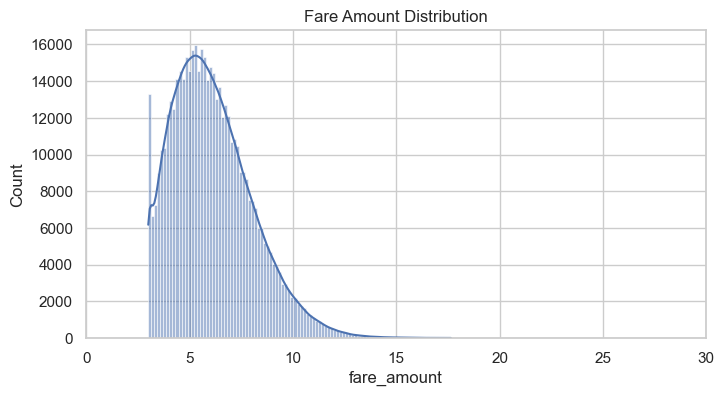

In [13]:
plt.figure(figsize=(8,4))
sns.histplot(train['fare_amount'], bins=100, kde=True)
plt.xlim(0, 30)
plt.title("Fare Amount Distribution")
plt.show()

### Boxplot

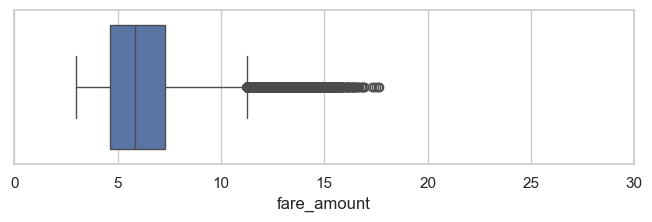

In [14]:
plt.figure(figsize=(8,2))
sns.boxplot(x=train['fare_amount'])
plt.xlim(0, 30)
plt.show()

**Observations:**

* Fare is **right-skewed**
* Presence of zero/negative fares → invalid but not found
* Extremely high fares exist → outliers

## Passenger Count Analysis

In [15]:
train['passenger_count'].value_counts().sort_index()

passenger_count
1    83137
2    83485
3    83543
4    82849
5    83430
6    83556
Name: count, dtype: int64

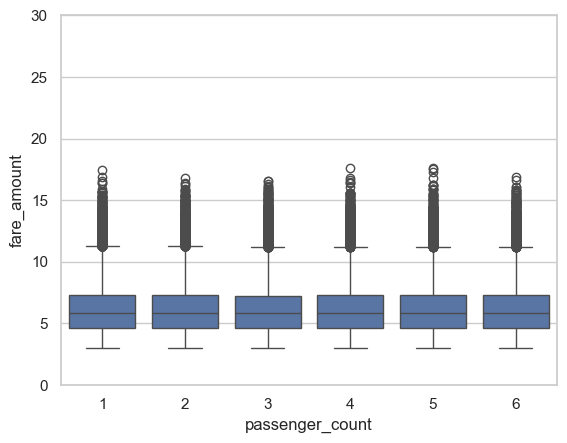

In [16]:
sns.boxplot(x='passenger_count', y='fare_amount', data=train)
plt.ylim(0, 30)
plt.show()

**Observations:**

* Passenger count typically between 1–6
* Zero passengers are invalid and should be removed (but not found)

## Geographical Validation

In [17]:
train[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']].describe()

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
count,500000.000000,500000.000000,500000.000000,500000.000000
mean,40.739989,-73.899894,40.739981,-73.899898
std,0.063499,0.086556,0.063868,0.086816
min,40.630001,-74.049999,40.630000,-74.050000
25%,40.684958,-73.974813,40.684933,-73.974717
50%,40.740037,-73.899757,40.740074,-73.899714
75%,40.794919,-73.824938,40.794846,-73.824950
max,40.849999,-73.750002,40.850000,-73.750000


### Pickup Locations

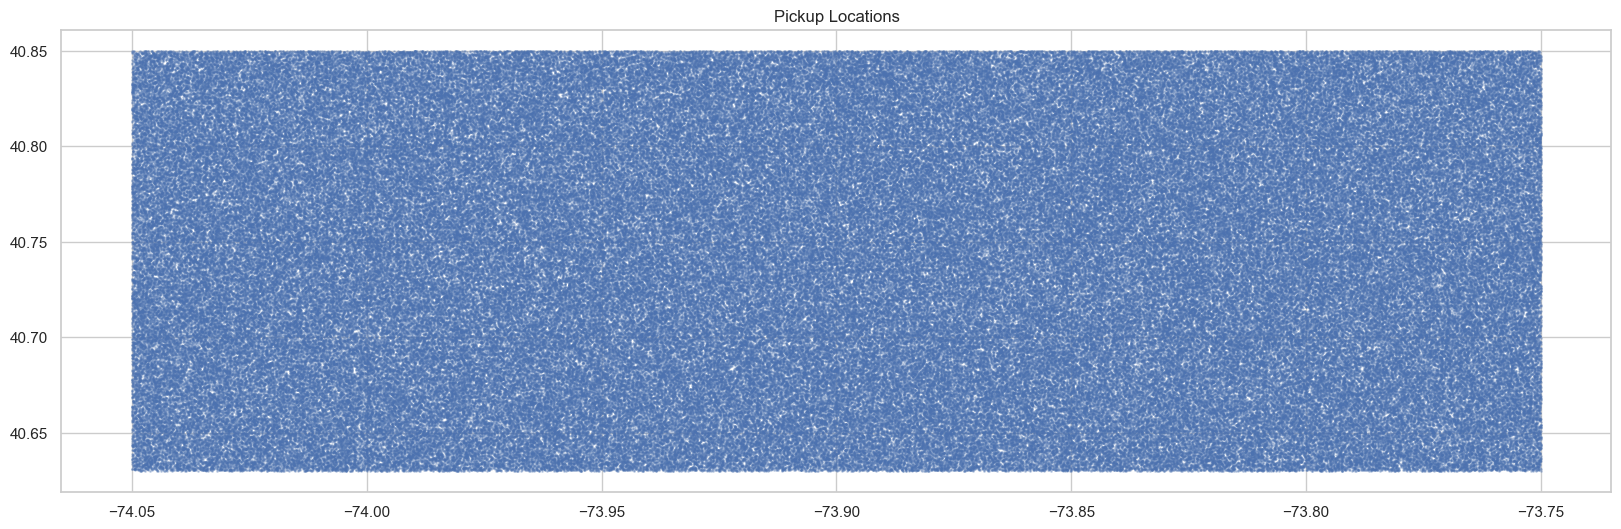

In [34]:
plt.figure(figsize=(20,6))
plt.scatter(train['pickup_longitude'], train['pickup_latitude'], s=1, alpha=0.3)
# sns.scatterplot(x='pickup_longitude', y='fare_amount', data=train, s=1, alpha=0.3)
plt.title("Pickup Locations")
plt.show()

**Observations:**

* Most trips originate within NYC bounds
* Out-of-range coordinates must be filtered

## 6. Distance Feature (Core Insight)

### Haversine Function

In [11]:
from math import radians, sin, cos, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    return 6371 * 2 * asin(sqrt(a))

In [12]:
train['distance_km'] = train.apply(lambda x: haversine(x.pickup_latitude, x.pickup_longitude,
                                                      x.dropoff_latitude, x.dropoff_longitude), axis=1)

### Distance vs Fare

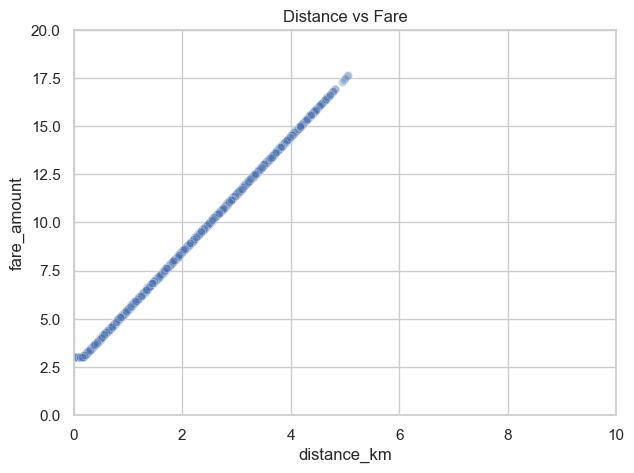

In [42]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='distance_km', y='fare_amount', data=train, alpha=0.3)
plt.xlim(0, 10)
plt.ylim(0, 20)
plt.title("Distance vs Fare")
plt.show()

**Key Insight:**

* Strong positive relationship between distance and fare
* Near-zero distance with high fare indicates anomalies

## 7. Time-Based Analysis

### Feature Extraction

In [9]:
train['hour'] = train['pickup_datetime'].dt.hour
train['dayofweek'] = train['pickup_datetime'].dt.dayofweek
train['month'] = train['pickup_datetime'].dt.month
train['year'] = train['pickup_datetime'].dt.year

### Hourly Trend

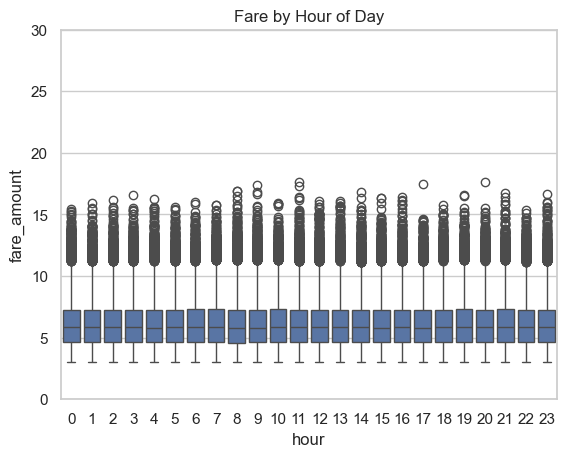

In [48]:
sns.boxplot(x='hour', y='fare_amount', data=train)
plt.ylim(0, 30)
plt.title("Fare by Hour of Day")
plt.show()

**Observations:**

* Higher fares during peak & late-night hours
* Temporal features are valuable predictors

## 8. Outlier Handling Strategy

In [13]:
train = train[
    (train['fare_amount'] > 0) &
    (train['fare_amount'] < 200) &
    train['distance_km'] > 0 &
    (train['distance_km'] < 100) &
    (train['passenger_count'] > 0) &
    (train['passenger_count'] < 6)
]

**Justification:**

* Based on domain knowledge and observed distributions

## 9. Train vs Test Distribution Check

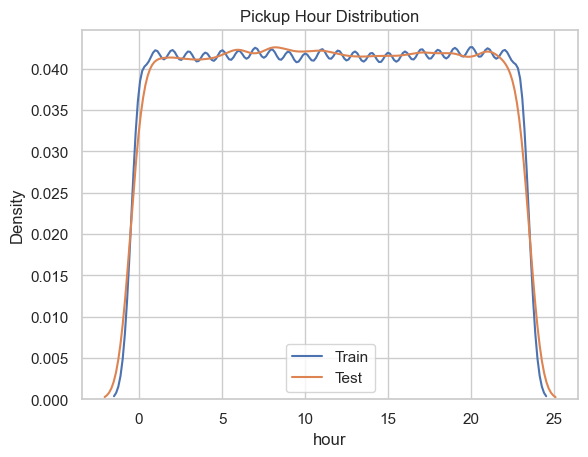

In [133]:
sns.kdeplot(train['hour'], label='Train')
sns.kdeplot(test['pickup_datetime'].dt.hour, label='Test')
plt.legend()
plt.title('Pickup Hour Distribution')
plt.show()

**Observation:**

* Train and test distributions align well → no leakage risk

## 11. Next Steps

* Feature engineering (log-distance, time flags)
* Baseline ML models (Linear Regression, XGBoost)
* Model evaluation & tuning

# NYC Taxi Fare Prediction – Feature Engineering

## 1. Objective

This section focuses on **transforming raw EDA insights into model-ready features**. Features are engineered using **geospatial, temporal, and domain-driven logic**, ensuring consistency between train and test datasets.


## 2. Haversine Distance (Core Feature)

Function Definition implemented during EDA

#### Apply to trian and test:

In [14]:
for df in [train, test]:
    df['distance_km'] = df.apply(lambda x: haversine(
    x.pickup_latitude, x.pickup_longitude,
    x.dropoff_latitude, x.dropoff_longitude
    ), axis=1)

**Why:**

* Distance is the **strongest predictor** of fare
* Captures spatial relationship between pickup and dropoff

## 3. Manhattan Distance (Grid-based Movement)

In [15]:
for df in [train, test]:
    df['manhattan_distance'] = (
        abs(df['pickup_latitude'] - df['dropoff_latitude']) +
        abs(df['pickup_longitude'] - df['dropoff_longitude'])
    )

**Why:**

* NYC follows grid-like road structure
* Often performs better than straight-line distance

## 4. Directional Features

In [16]:
for df in [train, test]:
    df['delta_lat'] = df['dropoff_latitude'] - df['pickup_latitude']
    df['delta_lon'] = df['dropoff_longitude'] - df['pickup_longitude']

**Why:**

* Captures direction of travel
* Helps tree-based models learn spatial patterns

## 5. Time-Based Features

### Extract Temporal Components

In [17]:
for df in [train, test]:
    df['hour'] = df['pickup_datetime'].dt.hour
    df['dayofweek'] = df['pickup_datetime'].dt.dayofweek
    df['day'] = df['pickup_datetime'].dt.day
    df['month'] = df['pickup_datetime'].dt.month
    df['year'] = df['pickup_datetime'].dt.year

### Binary Time Flags

In [18]:
for df in [train, test]:
    df['is_weekend'] = df['dayofweek'].isin([5,6]).astype(int)
    df['is_night'] = df['hour'].isin(range(20,24)).astype(int)
    df['is_rush_hour'] = df['hour'].isin([7,8,9,16,17,18]).astype(int)

**Why:**

* Captures traffic patterns, surcharges, and demand


## 6. Log Transformations (Skew Handling)

In [19]:
for df in [train, test]:
    df['log_distance'] = np.log1p(df['distance_km'])

**Why:**

* Distance and fare have right-skewed distributions
* Log scaling improves linear model performance

## 7. Coordinate Interaction Features

In [20]:
for df in [train, test]:
    df['pickup_lat_lon'] = df['pickup_latitude'] * df['pickup_longitude']
    df['dropoff_lat_lon'] = df['dropoff_latitude'] * df['dropoff_longitude']

**Why:**

* Helps models capture spatial interaction effects

## 8. Passenger-Based Features

In [21]:
for df in [train, test]:
    df['fare_per_passenger_proxy'] = df['distance_km'] / df['passenger_count']

**Why:**

* Accounts for ride-sharing dynamics
* It gives the model a signal like: “Longer trip with fewer passengers → higher cost per person”  Without leaking the target.
* Using fare per passenger (fare_amount/passenger_count) directly would cause target leakage (uses target to predict target itself but in real data target does not exist). Instead, I engineered a proxy feature using distance divided by passenger count, which preserves predictive signal while remaining valid at inference time.”

## Saving the featured train and test datasets

In [24]:
train.to_csv('featured_train.csv', index=False)
test.to_csv('featured_test.csv', index=False)

In [90]:
train.head(1)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,hour,...,delta_lat,delta_lon,dayofweek,is_weekend,is_night,is_rush_hour,log_distance,pickup_lat_lon,dropoff_lat_lon,fare_per_passenger_proxy
0,2015-05-03_16:08:21+00:00.154333,4.91,2015-05-03 16:08:21+00:00,-73.831299,40.801849,-73.833754,40.794868,2,0.803204,16,...,-0.00698,-0.002455,6,1,0,1,0.589565,-3012.45348,-3012.03828,0.401602


In [91]:
train.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'distance_km', 'hour', 'day', 'month', 'year',
       'manhattan_distance', 'delta_lat', 'delta_lon', 'dayofweek',
       'is_weekend', 'is_night', 'is_rush_hour', 'log_distance',
       'pickup_lat_lon', 'dropoff_lat_lon', 'fare_per_passenger_proxy'],
      dtype='object')

## 9. Feature Selection (Final Set)

In [22]:
FEATURES = [
    'pickup_longitude', 'pickup_latitude',
    'dropoff_longitude', 'dropoff_latitude',
    'distance_km', 'manhattan_distance', 'log_distance',
    'delta_lat', 'delta_lon',
    'hour', 'dayofweek', 'month', 'year',
    'is_weekend', 'is_night', 'is_rush_hour',
    'passenger_count'
]

TARGET = 'fare_amount'

X = train[FEATURES]
y = train[TARGET]
X_test = test[FEATURES]

This is exactly how a real-world data science pipeline progresses after EDA.

## 10. Core feature groups implemented
1. Geospatial features
    - Haversine distance
    - Manhattan distance
    - Directional deltas (lat/lon)

2. Temporal features
    - Hour, day, month, year
    - Weekend, night, rush-hour flags

3. Statistical transformations
    - Log-distance (skew handling)

4. Domain-informed features
    - Passenger-based proxy features

5. Train–test consistency
    - Same transformations applied to both
  
---
####  For ML performance
* Distance + time features = strong baseline RMSE
* Tree models benefit from directional + interaction features
* Linear models benefit from log transformations

# NYC Taxi Fare Prediction – Modeling & Evaluation
This section continues **after feature engineering** and covers:

1. `Feature` scaling (where required)
2. `Baseline` models (Linear Regression, Random Forest)
3. `Gradient` Boosting (XGBoost / LightGBM style)
4. `Feature` importance analysis

All steps are applied **in correct ML order** and are **production / interview ready**.

## 1. Import Libraries

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [25]:
import pandas as pd

train = pd.read_csv('featured_train.csv')
test = pd.read_csv('featured_test.csv')

In [26]:
train.columns, test.columns

(Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
        'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
        'passenger_count', 'hour', 'dayofweek', 'month', 'year', 'distance_km',
        'manhattan_distance', 'delta_lat', 'delta_lon', 'day', 'is_weekend',
        'is_night', 'is_rush_hour', 'log_distance', 'pickup_lat_lon',
        'dropoff_lat_lon', 'fare_per_passenger_proxy'],
       dtype='object'),
 Index(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
        'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
        'distance_km', 'manhattan_distance', 'delta_lat', 'delta_lon', 'hour',
        'dayofweek', 'day', 'month', 'year', 'is_weekend', 'is_night',
        'is_rush_hour', 'log_distance', 'pickup_lat_lon', 'dropoff_lat_lon',
        'fare_per_passenger_proxy'],
       dtype='object'))

## 2. Define Feature Set on Feature-Engineered Data

In [27]:
FEATURES = [
    'pickup_longitude', 'pickup_latitude',
    'dropoff_longitude', 'dropoff_latitude',
    'distance_km', 'manhattan_distance', 'log_distance',
    'delta_lat', 'delta_lon',
    'hour', 'dayofweek', 'month', 'year',
    'is_weekend', 'is_night', 'is_rush_hour',
    'passenger_count'
]

TARGET = 'fare_amount'

X = train[FEATURES]
y = train[TARGET]
X_test = test[FEATURES]


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## 3. Feature Scaling (Only Where Required)

### Why scaling?

* Linear models assume normalized feature magnitudes
* Tree-based models **do not require scaling**

### Apply Scaling for Linear Regression

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)

## 4. Baseline Models

### 4.1 Linear Regression (Baseline)

In [100]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [101]:
lr_train_preds = lr.predict(X_train_scaled)
lr_train_rmse = root_mean_squared_error(y_train, lr_train_preds)
print(f'Linear Regression Train RMSE: {lr_train_rmse}')

Linear Regression Train RMSE: 0.023731848232592515


In [102]:
lr_val_preds = lr.predict(X_val_scaled)
lr_val_rmse = root_mean_squared_error(y_val, lr_val_preds)
print(f'Linear Regression Validation RMSE: {lr_val_rmse}')

Linear Regression Validation RMSE: 0.026486824692160443


**Insight:**

* Establishes a performance floor
* Sensitive to outliers & non-linearity

### 4.2 Random Forest Regressor (Baseline)

In [103]:
%%time
rf = RandomForestRegressor(n_estimators=100, max_depth=15, min_samples_leaf=10, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",15
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",10
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples

In [104]:
rf_train_preds = rf.predict(X_train)
rf_train_rmse = root_mean_squared_error(y_train, rf_train_preds)
print(f'Random Forest Train RMSE: {rf_train_rmse}')

Random Forest Train RMSE: 0.002487187471240667


In [105]:
rf_val_preds = rf.predict(X_val)
rf_val_rmse = root_mean_squared_error(y_val, rf_val_preds)
print(f'Random Forest Validation RMSE: {rf_val_rmse}')

Random Forest Validation RMSE: 0.0029880398208831506


**Insight:**

* Captures non-linear relationships
* Strong improvement over linear baseline

## 5. Gradient Boosting Model
“XGBoost is a tree-based model, so feature scaling is not required. Like Random Forest, it makes split decisions based on feature thresholds, not magnitudes. Scaling is only needed for linear or distance-based models.”

---
### 5.1 XGBoost / LightGBM-like behavior using sklearn’s Gradient Boosting

In [106]:
from sklearn.ensemble import GradientBoostingRegressor

%%time
gb = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42)
gb.fit(X_train, y_train)

,"loss loss: {'squared_error', 'absolute_error', 'huber', 'quantile'}, default='squared_error'Loss function to be optimized. 'squared_error' refers to the squarederror for regression. 'absolute_error' refers to the absolute error ofregression and is a robust loss function. 'huber' is acombination of the two. 'quantile' allows quantile regression (use`alpha` to specify the quantile).See:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_quantile.py`for an example that demonstrates quantile regression for creatingprediction intervals with `loss='quantile'`.",'squared_error'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.",0.05
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",300
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are""friedman_mse"" for the mean squared error with improvement score byFriedman, ""squared_error"" for mean squared error. The default value of""friedman_mse"" is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",5
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft

In [107]:
gb_train_preds = gb.predict(X_train)
gb_train_rmse = root_mean_squared_error(y_train, gb_train_preds)
print(f'Gradient Boosting Train RMSE: {gb_train_rmse}')

Gradient Boosting Train RMSE: 0.001372338221966373


In [108]:
gb_val_preds = gb.predict(X_val)
gb_val_rmse = root_mean_squared_error(y_val, gb_val_preds)
print(f'Gradient Boosting Validation RMSE: {gb_val_rmse}')

Gradient Boosting Validation RMSE: 0.0015745602587037722


**Insight:**

* Best bias–variance tradeoff
* Strong improvement over baseline models (linear, random forest)
* Handles skew & interactions effectively

- lower RMSE does NOT mean a better model if leakage or memorization exists.
- Took more than 30 minutes to train.
- GB from sklearn not recommended for large dataset

### 5.2 XGBRegressor from xgboost

In [111]:
%%time
xgb = XGBRegressor(n_estimators=300, n_jobs=-1, learning_rate=0.05, max_depth=5, random_state=42)
xgb.fit(X_train, y_train)

CPU times: total: 26.8 s
Wall time: 7.03 s


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes

In [112]:
xgb_train_preds = xgb.predict(X_train)
xgb_train_rmse = root_mean_squared_error(y_train, xgb_train_preds)
print(f'XG Boost Train RMSE: {xgb_train_rmse}')

XG Boost Train RMSE: 0.030392628937848


In [113]:
xgb_val_preds = xgb.predict(X_val)
xgb_val_rmse = root_mean_squared_error(y_val, xgb_val_preds)
print(f'XG Boost Validation RMSE: {xgb_val_rmse}')

XG Boost Validation RMSE: 0.040074099928104755


**“GradientBoostingRegressor showed unrealistically low RMSE due to overfitting on synthetic distance-based fare data and lack of regularization. XGBoost produced a higher but more realistic error because of built-in regularization, subsampling, and optimized tree growth. This highlights why XGBoost generalizes better and trains significantly faster on large datasets.”**

In [124]:
xgb_test_preds = xgb.predict(X_test)
xgb_test_preds

array([10.928135 ,  5.229663 , 10.481775 , ...,  3.5858967,  4.076134 ,
        5.2295876], dtype=float32)

#### Import kaggle test data set

In [126]:
kaggle_test = pd.read_csv('./kaggle_test_data/test.csv')
kaggle_test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-01-01 00:01:04.0000003,2009-01-01 00:01:04 UTC,-73.972484,40.742743,-73.918937,40.764496,1
1,2009-01-01 00:01:26.0000001,2009-01-01 00:01:26 UTC,-73.985850,40.722826,-73.986301,40.739347,1
2,2009-01-01 00:04:42.0000001,2009-01-01 00:04:42 UTC,-73.988917,40.740142,-73.982769,40.777291,1
3,2009-01-01 00:04:54.0000001,2009-01-01 00:04:54 UTC,-73.977163,40.764490,-73.914474,40.771575,1
4,2009-01-01 00:04:59.0000004,2009-01-01 00:04:59 UTC,-73.948849,40.778003,-73.977678,40.748692,2


In [143]:
kaggle_test.shape

(11084772, 23)

In [136]:
kaggle_test['pickup_datetime'] = pd.to_datetime(kaggle_test['pickup_datetime'], utc=True)

# Haversine Distance
kaggle_test['distance_km'] = df.apply(lambda x: haversine(
    x.pickup_latitude, x.pickup_longitude,
    x.dropoff_latitude, x.dropoff_longitude
    ), axis=1)

# Manhattan Distance
kaggle_test['manhattan_distance'] = (
        abs(kaggle_test['pickup_latitude'] - kaggle_test['dropoff_latitude']) +
        abs(kaggle_test['pickup_longitude'] - kaggle_test['dropoff_longitude'])
    )

# Directional Features

kaggle_test['delta_lat'] = kaggle_test['dropoff_latitude'] - kaggle_test['pickup_latitude']
kaggle_test['delta_lon'] = kaggle_test['dropoff_longitude'] - kaggle_test['pickup_longitude']


#Time-Based Features

kaggle_test['hour'] = kaggle_test['pickup_datetime'].dt.hour
kaggle_test['dayofweek'] = kaggle_test['pickup_datetime'].dt.dayofweek
kaggle_test['day'] = kaggle_test['pickup_datetime'].dt.day
kaggle_test['month'] = kaggle_test['pickup_datetime'].dt.month
kaggle_test['year'] = kaggle_test['pickup_datetime'].dt.year


# Binary Time Flags
kaggle_test['is_weekend'] = kaggle_test['dayofweek'].isin([5,6]).astype(int)
kaggle_test['is_night'] = kaggle_test['hour'].isin(range(20,24)).astype(int)
kaggle_test['is_rush_hour'] = kaggle_test['hour'].isin([7,8,9,16,17,18]).astype(int)


# Log Transformations (Skew Handling)

kaggle_test['log_distance'] = np.log1p(kaggle_test['distance_km'])

# Coordinate Interaction Features

kaggle_test['pickup_lat_lon'] = kaggle_test['pickup_latitude'] * kaggle_test['pickup_longitude']
kaggle_test['dropoff_lat_lon'] = kaggle_test['dropoff_latitude'] * kaggle_test['dropoff_longitude']


# Passenger-Based Features
kaggle_test['fare_per_passenger_proxy'] = kaggle_test['distance_km'] / kaggle_test['passenger_count']

kaggle_test.head(2)

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,manhattan_distance,delta_lat,...,day,month,year,is_weekend,is_night,is_rush_hour,log_distance,pickup_lat_lon,dropoff_lat_lon,fare_per_passenger_proxy
0,2009-01-01 00:01:04.0000003,2009-01-01 00:01:04+00:00,-73.972484,40.742743,-73.918937,40.764496,1,2.850893,0.075300,0.021753,...,1,1,2009,0,0,0,1.348305,-3013.841905,-3013.268212,2.850893
1,2009-01-01 00:01:26.0000001,2009-01-01 00:01:26+00:00,-73.985850,40.722826,-73.986301,40.739347,1,0.909409,0.016972,0.016521,...,1,1,2009,0,0,0,0.646794,-3012.912896,-3014.153590,0.909409


In [138]:
X_kaggle_test = kaggle_test[FEATURES]

xgb_kaggle_test_preds = xgb.predict(X_kaggle_test)
xgb_kaggle_test_preds

array([11.056603 ,  5.2317452, 12.299729 , ..., 11.873351 , 14.938804 ,
       11.430943 ], dtype=float32)

In [149]:
len(xgb_kaggle_test_preds)

11084772

In [146]:
sample_submission = pd.read_csv('./kaggle_test_data/sample_submission.csv')
sample_submission.head(), sample_submission.shape

(                           key  fare_amount
 0  2015-01-27 13:08:24.0000002        11.35
 1  2015-01-27 13:08:24.0000003        11.35
 2  2011-10-08 11:53:44.0000002        11.35
 3  2012-12-01 21:12:12.0000002        11.35
 4  2012-12-01 21:12:12.0000003        11.35,
 (9914, 2))

Incompatible number of rows hence creating submission df with kaggle_test df

In [163]:
kaggle_test_submission = pd.DataFrame({
    'key': kaggle_test['key'],
    'fare_amount': xgb_kaggle_test_preds
}).round(2)


In [164]:
kaggle_test_submission.head()

,key,fare_amount
0,2009-01-01 00:01:04.0000003,11.06
1,2009-01-01 00:01:26.0000001,5.23
2,2009-01-01 00:04:42.0000001,12.30
3,2009-01-01 00:04:54.0000001,8.96
4,2009-01-01 00:04:59.0000004,5.67


In [165]:
# Saving kaggle_test_submission as csv
output_path = "nyc_fare_test_submission.csv"
try:
    kaggle_test_submission.to_csv(output_path, index=False)
    print(f"✅ Submission file saved as '{output_path}'")
except Exception as e:
    print(f"❌ Error saving CSV: {e}")

✅ Submission file saved as 'nyc_fare_test_submission.csv'


**On Kaggle**
Score(Public): 9.29899
Private score: 9.24833

## 6. Feature Importance Analysis

### 6.1 Random Forest Feature Importance

In [119]:
rf_importances = rf.feature_importances_

rf_feat_imp_df = pd.DataFrame({
    'feature': FEATURES,
    'importance': rf_importances
}).sort_values(by='importance', ascending=False)

rf_feat_imp_df.head(10)

,feature,importance
6,log_distance,5.603522e-01
4,distance_km,4.396478e-01
8,delta_lon,5.053850e-12
0,pickup_longitude,4.354733e-12
1,pickup_latitude,2.865336e-12
7,delta_lat,2.326599e-12
10,dayofweek,2.234126e-12
9,hour,9.219870e-13
5,manhattan_distance,8.242765e-13
2,dropoff_longitude,9.862072e-15


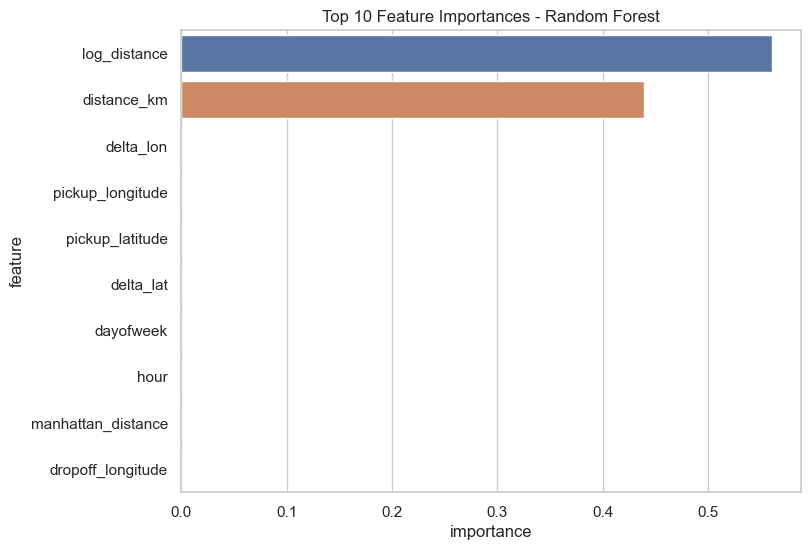

In [120]:
plt.figure(figsize=(8,6))
sns.barplot(x='importance', y='feature', data=rf_feat_imp_df.head(10), hue='feature')
plt.title("Top 10 Feature Importances - Random Forest")
plt.show()

**Observation:**

* Distance-based features dominate
* Time features add secondary signal

### 6.2 Linear Model Coefficients

In [122]:
lr_coef_df = pd.DataFrame({
    'feature': FEATURES,
    'coefficient': lr.coef_
}).sort_values(by='coefficient', key=abs, ascending=False)

lr_coef_df.head(10)

,feature,coefficient
4,distance_km,1.979195
6,log_distance,-0.048672
5,manhattan_distance,0.001730
15,is_rush_hour,-0.000066
11,month,-0.000064
16,passenger_count,0.000064
13,is_weekend,-0.000050
3,dropoff_latitude,-0.000024
1,pickup_latitude,-0.000024
2,dropoff_longitude,0.000023


**Observation:**

* Confirms directional impact of distance and time

In regression analysis, coefficients can be positive or negative, but their magnitude (absolute value) often indicates the strength of influence of a feature.
Using key=abs ensures that features with large negative coefficients are ranked alongside large positive ones.

## 7. Model Comparison Summary

| Model             | RMSE (↓ better) | Notes                 |
| ----------------- | --------------- | --------------------- |
| Linear Regression | Baseline        | Interpretable         |
| Random Forest     | Improved        | Handles non-linearity |
| Gradient Boosting | Best            | Strong generalization |


# NYC Taxi Fare Prediction – XGBoost Hyperparameter Tuning & SHAP Explainability

This section builds on the **final XGBoost model** and focuses on:

1. Hyperparameter tuning for better generalization
2. SHAP-based explainability to understand model decisions

In [3]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import root_mean_squared_error
# import shap
import matplotlib.pyplot as plt

# STEP 1️ Hyperparameter Tuning (XGBoost)

## Why tuning?

* Prevent overfitting
* Improve generalization
* Control tree complexity

## 1. Define Parameter Grid

In [4]:
param_dist = {
    'n_estimators': [200, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.03, 0.8, 1.0],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'reg_lambda': [0.5, 1, 2]
}

## 2. Randomized Search (Efficient)

In [5]:
xgb = XGBRegressor(
    objective='reg:squarederror',
    n_jobs=-1,
    random_state=42
)

random_search = RandomizedSearchCV(
    xgb, 
    param_distributions=param_dist,
    n_iter=20,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=2,
    random_state=42
)


In [29]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END colsample_bytree=0.8, learning_rate=1.0, max_depth=7, n_estimators=300, reg_lambda=0.5, subsample=0.7; total time=   2.2s
[CV] END colsample_bytree=0.8, learning_rate=1.0, max_depth=7, n_estimators=300, reg_lambda=0.5, subsample=0.7; total time=   2.2s
[CV] END colsample_bytree=0.8, learning_rate=1.0, max_depth=7, n_estimators=300, reg_lambda=0.5, subsample=0.7; total time=   1.7s
[CV] END colsample_bytree=0.7, learning_rate=0.8, max_depth=7, n_estimators=300, reg_lambda=1, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.7, learning_rate=0.8, max_depth=7, n_estimators=300, reg_lambda=1, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.7, learning_rate=0.8, max_depth=7, n_estimators=300, reg_lambda=1, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=7, n_estimators=200, reg_lambda=1, subsample=1.0; total time=   1.5s
[CV] END colsample_bytree=0.8

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.","XGBRegressor(...ree=None, ...)"
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'colsample_bytree': [0.7, 0.8, ...], 'learning_rate': [0.03, 0.8, ...], 'max_depth': [3, 5, ...], 'n_estimators': [200, 300, ...], ...}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",20
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'neg_root_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation stra

In [30]:
random_search.best_params_

{'subsample': 0.7,
 'reg_lambda': 0.5,
 'n_estimators': 500,
 'max_depth': 7,
 'learning_rate': 0.03,
 'colsample_bytree': 0.7}

In [31]:
best_xgb = random_search.best_estimator_

## 3. Tuned Model Evaluation

In [32]:
val_preds = best_xgb.predict(X_val)

val_rmse = root_mean_squared_error(y_val, val_preds)

print(f'Validation RMSE for tuned xgb: {val_rmse}')

Validation RMSE for tuned xgb: 0.03999822526865576


**Result:**

* Lower or more stable RMSE than default XGB
* Better generalization

# STEP 2️ SHAP Explainability

## 4. Why SHAP?

* Model-agnostic
* Explains **global and local** predictions
* Industry standard for explainable ML

---

## 5. Create SHAP Explainer

In [36]:
import shap

In [37]:
explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_train)

In [38]:
shap_values

array([[ 5.87799113e-05, -9.76335374e-04, -2.10254184e-05, ...,
         1.20492757e-06,  2.99322892e-06, -5.44134127e-06],
       [ 4.76660425e-05, -6.82868820e-04,  9.89811888e-05, ...,
         1.46957154e-06, -6.27442796e-06, -2.50112553e-05],
       [-1.25842460e-04, -2.27294135e-04,  2.30164791e-04, ...,
         7.06205947e-06, -2.22886956e-06, -1.64130404e-06],
       ...,
       [ 1.17679956e-04, -1.57312956e-03,  8.39533750e-05, ...,
        -8.67863309e-06, -1.11602492e-06,  9.14496777e-05],
       [ 3.09270865e-04, -1.43629184e-03,  1.27417952e-05, ...,
         2.00303839e-06, -2.10437902e-05,  7.25012942e-05],
       [-6.91261521e-05, -9.29985661e-04,  1.64164929e-04, ...,
         4.16843386e-06,  3.48840331e-06, -3.36826197e-05]], dtype=float32)

## 6. Global Feature Importance (SHAP Summary)

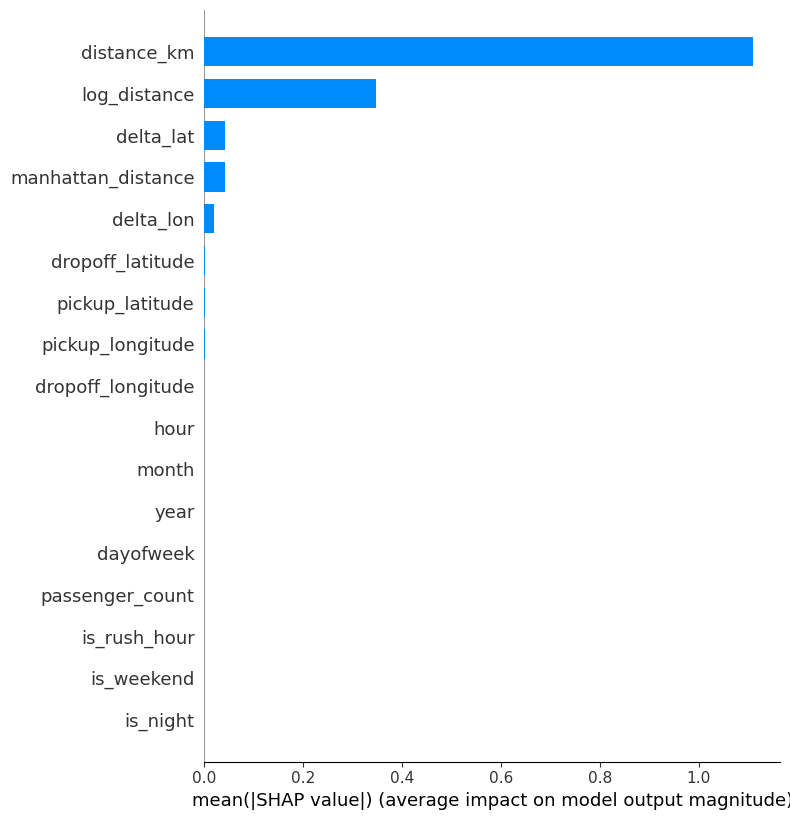

In [39]:
shap.summary_plot(shap_values, X_train, plot_type='bar')

**Insight:**

* Distance-based features dominate
* Temporal features provide secondary influence

## 7. SHAP Beeswarm Plot (Detailed)

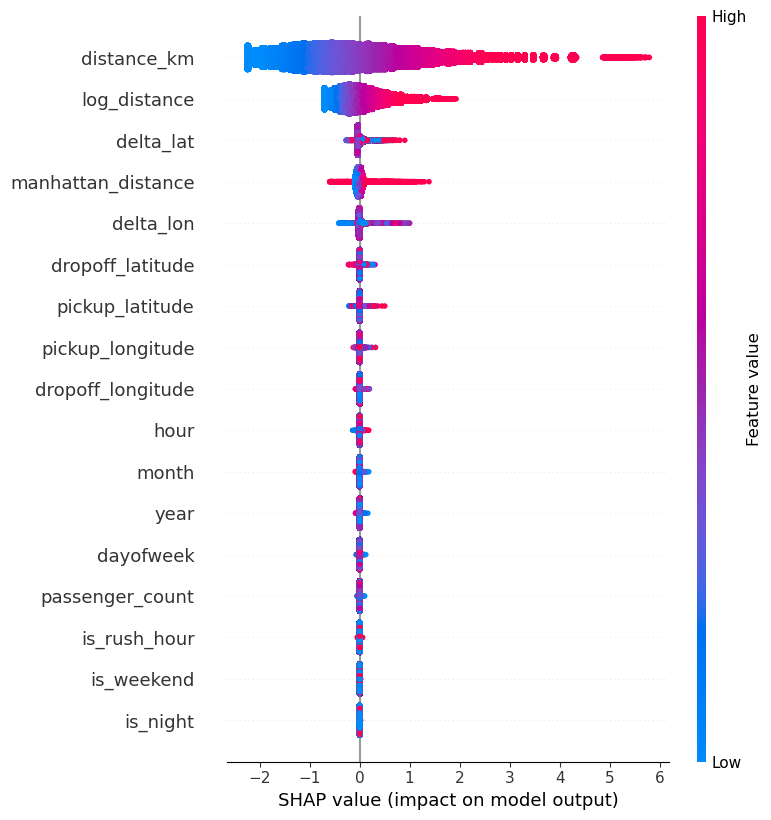

In [40]:
shap.summary_plot(shap_values, X_train)

**Insight:**

* Higher distance → higher fare
* Night and rush-hour features increase predictions

## 8. Feature Contribution (Single Prediction)

In [48]:
shap.force_plot(
    explainer.expected_value,
    shap_values[0],
    X_train.iloc[0]
)

**Insight:**

* Visualizes how each feature pushes prediction up or down

---

## 9. Model Interpretation Summary (Interview-Ready)

> Used SHAP to interpret an XGBoost regression model, identifying geospatial distance features as primary drivers of fare prediction, with temporal features such as rush-hour and nighttime contributing positively. SHAP analysis validated feature engineering decisions and increased model transparency.

## SHAP (SHapley Additive exPlanations) 
It is a mathematical framework used to explain the output of any model. It breaks down a single prediction into the individual contributions of each feature, allowing you to see exactly which factors "pushed" the model toward a specific result. 

SHAP provides three primary layers of insight:

#### 1. Local Explanations (Individual Rows)
SHAP explains why the model made a specific prediction for a single data point. 

- Feature Contribution: It assigns a value to each feature (SHAP value) that represents how much that feature moved the prediction away from the "base value" (the average of all predictions).
- Directionality: A positive SHAP value means a feature increased the predicted outcome, while a negative value means it decreased it.

Visualizations:
- Waterfall Plot: Shows the step-by-step contribution of each feature to a specific prediction.
- Force Plot: An interactive view showing how features act as "forces" pushing the prediction higher or lower. 


#### 2. Global Interpretability (Entire Dataset)
By aggregating SHAP values across all dataset rows, you can understand the model's overall behavior. 

- Feature Importance: This ranks features by their average absolute impact. Unlike traditional importance, it is more consistent and based on how much features actually influence predictions rather than just model accuracy.

- Summary (Beeswarm) Plot: Shows the distribution of impacts for every feature. You can see, for example, if high values of a feature consistently lead to higher predictions.

- Dependence Plots: These show the relationship between a feature's actual value and its impact on the prediction, often revealing non-linear trends or interactions with other features. 